In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import string
import nltk
from nltk import tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,classification_report

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (10,7)
plt.rcParams['font.size'] = 18

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
#load the data
data=pd.read_csv("/content/reviews.csv")
data.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [ ]:
data.iloc[4,1]

"Dear Spotify why do I get songs that I didn't put on my playlist??? And why do we have shuffle play?"

In [ ]:
print(f'Number of samples: {data.shape[0]}\nNumber of features: {data.shape[1]}')

Number of samples: 61594
Number of features: 5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [ ]:
data['Reply'].isna().sum()

61378

In [ ]:
data.drop(['Time_submitted', 'Reply'], axis=1, inplace=True)

In [ ]:
data.head()

,Review,Rating,Total_thumbsup
0,"Great music service, the audio is high quality...",5,2
1,Please ignore previous negative rating. This a...,5,1
2,"This pop-up ""Get the best Spotify experience o...",4,0
3,Really buggy and terrible to use as of recently,1,1
4,Dear Spotify why do I get songs that I didn't ...,1,1


In [ ]:
def transform_ratings(rating):
    if rating == 5 or rating == 4:
        return "Good"
    if rating == 3:
        return "Neutral"
    if rating == 2 or rating == 1:
        return "Bad"

In [ ]:
data['Rating'] = data['Rating'].apply(transform_ratings)
data['length'] = data['Review'].str.len()

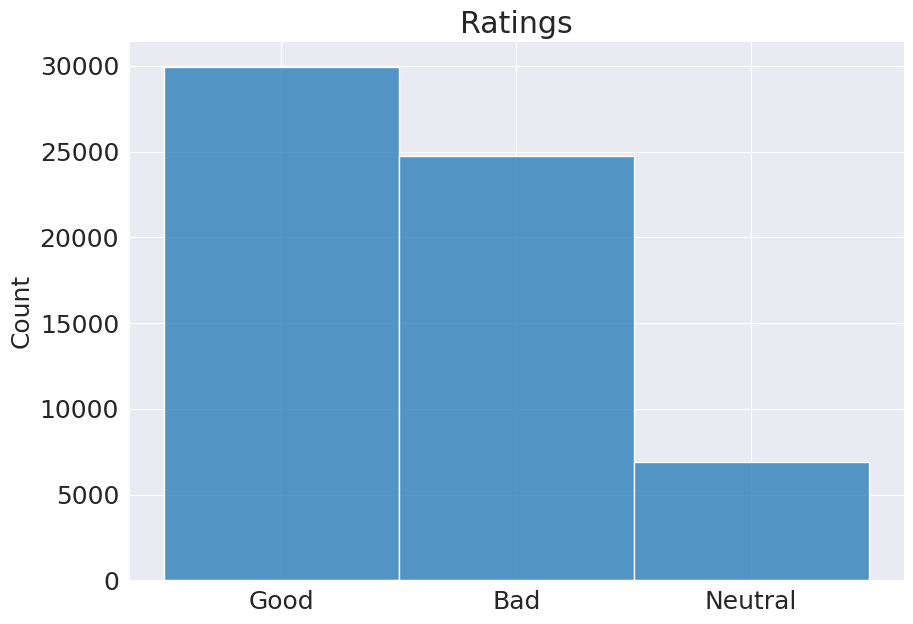

In [ ]:
sns.histplot(data['Rating'])
plt.title('Ratings')
plt.xlabel('')
plt.show()

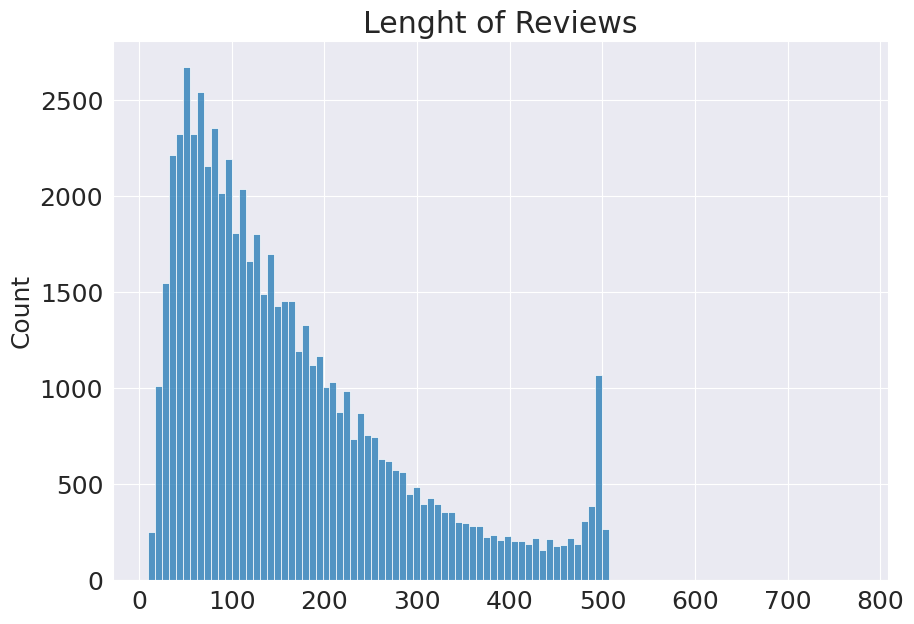

In [ ]:
sns.histplot(data['length'][data.length<800])
plt.title('Lenght of Reviews')
plt.xlabel('')
plt.show()

In [ ]:
data['length'].describe()

count    61594.000000
mean       163.323457
std        119.940997
min         10.000000
25%         72.000000
50%        130.000000
75%        221.000000
max       3753.000000
Name: length, dtype: float64

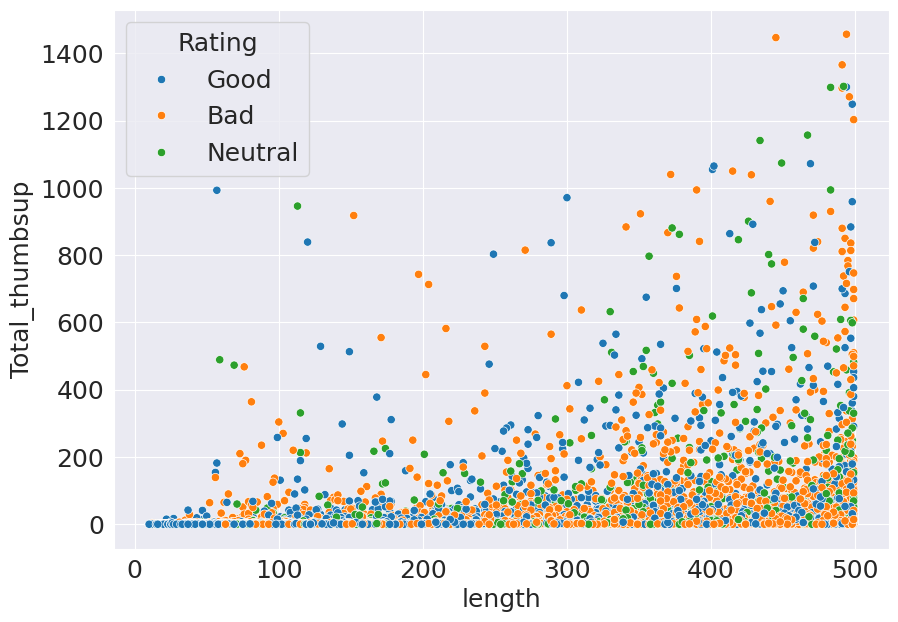

In [ ]:
sns.scatterplot(x=data['length'][data.length < 500], y=data['Total_thumbsup'][data.Total_thumbsup < 1500], hue=data['Rating'])
plt.show()

In [ ]:
#convert into lowercase
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data.head(10)

,Review,Rating,Total_thumbsup,length
0,"great music service, the audio is high quality...",Good,2,112
1,please ignore previous negative rating. this a...,Good,1,86
2,"this pop-up ""get the best spotify experience o...",Good,0,106
3,really buggy and terrible to use as of recently,Bad,1,47
4,dear spotify why do i get songs that i didn't ...,Bad,1,100
5,the player controls sometimes disappear for no...,Neutral,7,114
6,i love the selection and the lyrics are provid...,Good,0,83
7,still extremely slow when changing storage to ...,Neutral,16,352
8,it's a great app and the best mp3 music app i ...,Good,0,210
9,"i'm deleting this app, for the following reaso...",Bad,318,443


In [ ]:
#remove punctuations
import re
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: re.sub('[^a-z A-Z 0-9-]+', '', word))
data.head(10)

,Review,Rating,Total_thumbsup,length
0,great music service the audio is high quality ...,Good,2,112
1,please ignore previous negative rating this ap...,Good,1,86
2,this pop-up get the best spotify experience on...,Good,0,106
3,really buggy and terrible to use as of recently,Bad,1,47
4,dear spotify why do i get songs that i didnt p...,Bad,1,100
5,the player controls sometimes disappear for no...,Neutral,7,114
6,i love the selection and the lyrics are provid...,Good,0,83
7,still extremely slow when changing storage to ...,Neutral,16,352
8,its a great app and the best mp3 music app i h...,Good,0,210
9,im deleting this app for the following reasons...,Bad,318,443


In [ ]:
#remove stop words
import nltk
nltk.download('stopwords')
stop_words = stopwords.words('english')
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(word for word in word.split() if word not in stop_words))
data.head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,Rating,Total_thumbsup,length
0,great music service audio high quality app eas...,Good,2,112
1,please ignore previous negative rating app sup...,Good,1,86
2,pop-up get best spotify experience android 12 ...,Good,0,106
3,really buggy terrible use recently,Bad,1,47
4,dear spotify get songs didnt put playlist shuf...,Bad,1,100
5,player controls sometimes disappear reason app...,Neutral,7,114
6,love selection lyrics provided song youre list...,Good,0,83
7,still extremely slow changing storage external...,Neutral,16,352
8,great app best mp3 music app ever used one pro...,Good,0,210
9,im deleting app following reasons app failing ...,Bad,318,443


In [ ]:
#lemmatize using wordnet lemmatizer
nltk.download('wordnet')
lemmat = WordNetLemmatizer()
data.loc[:,'Review'] = data.loc[:,'Review'].apply(lambda word: " ".join(lemmat.lemmatize(word) for word in word.split()))
data.head(10)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Review,Rating,Total_thumbsup,length
0,great music service audio high quality app eas...,Good,2,112
1,please ignore previous negative rating app sup...,Good,1,86
2,pop-up get best spotify experience android 12 ...,Good,0,106
3,really buggy terrible use recently,Bad,1,47
4,dear spotify get song didnt put playlist shuff...,Bad,1,100
5,player control sometimes disappear reason app ...,Neutral,7,114
6,love selection lyric provided song youre liste...,Good,0,83
7,still extremely slow changing storage external...,Neutral,16,352
8,great app best mp3 music app ever used one pro...,Good,0,210
9,im deleting app following reason app failing b...,Bad,318,443


In [ ]:
#split into training and testing data
X = data['Review']
y = data['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((46195,), (15399,), (46195,), (15399,))

In [ ]:
#use label encoder
le = LabelEncoder()
le.fit(y_train)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [ ]:
#vectorize the text
cv = CountVectorizer()
cv.fit(X_train)
X_train_count = cv.transform(X_train)
X_test_count = cv.transform(X_test)

In [ ]:
#character level tfidf
tfidf = TfidfVectorizer(analyzer='char', ngram_range=(2,3))
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
#random forest ==> count vectors
rf1 = RandomForestClassifier()
rf1.fit(X_train_count, y_train)
rf_cv = rf1.score(X_test_count, y_test)
print(f'Random Forest Classifier on Count Vectors: {rf_cv}')

Random Forest Classifier on Count Vectors: 0.7777128384960063


In [ ]:
#random forest ==> TFIDF
rf2 = RandomForestClassifier()
rf2.fit(X_train_tfidf, y_train)
rf_tfidf = rf2.score(X_test_tfidf, y_test)
print(f'Random Forest Classifier on TF-IDF Vectors: {rf_tfidf}')

Random Forest Classifier on TF-IDF Vectors: 0.7504383401519579


In [ ]:
#multinomial NB ==> count vectors
mnb1 = MultinomialNB()
mnb1.fit(X_train_count, y_train)
mnb_cv = mnb1.score(X_test_count, y_test)
print(f'Multinomial Naive Bayes Classifier on Count Vectors: {mnb_cv}')

Multinomial Naive Bayes Classifier on Count Vectors: 0.7755049029157738


In [ ]:
#multinomial NB ==> tfidf
mnb2 = MultinomialNB()
mnb2.fit(X_train_tfidf, y_train)
mnb_tfidf = mnb2.score(X_test_tfidf, y_test)
print(f'Multinomial Naive Bayes Classifier on TF-IDF Vectors: {mnb_tfidf}')

Multinomial Naive Bayes Classifier on TF-IDF Vectors: 0.7555685434119098


In [ ]:
model = {'Model':['RandomForestClassifier-CountVectors',
                  'RandomForestClassifier-TFIDFVectors',
                  'MultinomialNBClassifier-CountVectors',
                  'MultinomialNBClassifier-TFIDFVectors'],
         'Score':[rf_cv, rf_tfidf, mnb_cv, mnb_tfidf]
         }
model_df = pd.DataFrame(model)
model_df

,Model,Score
0,RandomForestClassifier-CountVectors,0.777713
1,RandomForestClassifier-TFIDFVectors,0.756106
2,MultinomialNBClassifier-CountVectors,0.775505
3,MultinomialNBClassifier-TFIDFVectors,0.755569


In [ ]:
#testing on unseen data
test_reviews = ['This is a great app!', 'Great app, good songs!', 'Never gonna use it, so pathetic!']
pred = mnb1.predict(cv.transform(test_reviews))
pred_transformed = le.inverse_transform(pred).tolist()

In [ ]:
result = pd.DataFrame({'Reviews':test_reviews,
                       'Outcome': pred_transformed})
result

,Reviews,Outcome
0,This is a great app!,Good
1,"Great app, good songs!",Good
2,"Never gonna use it, so pathetic!",Bad


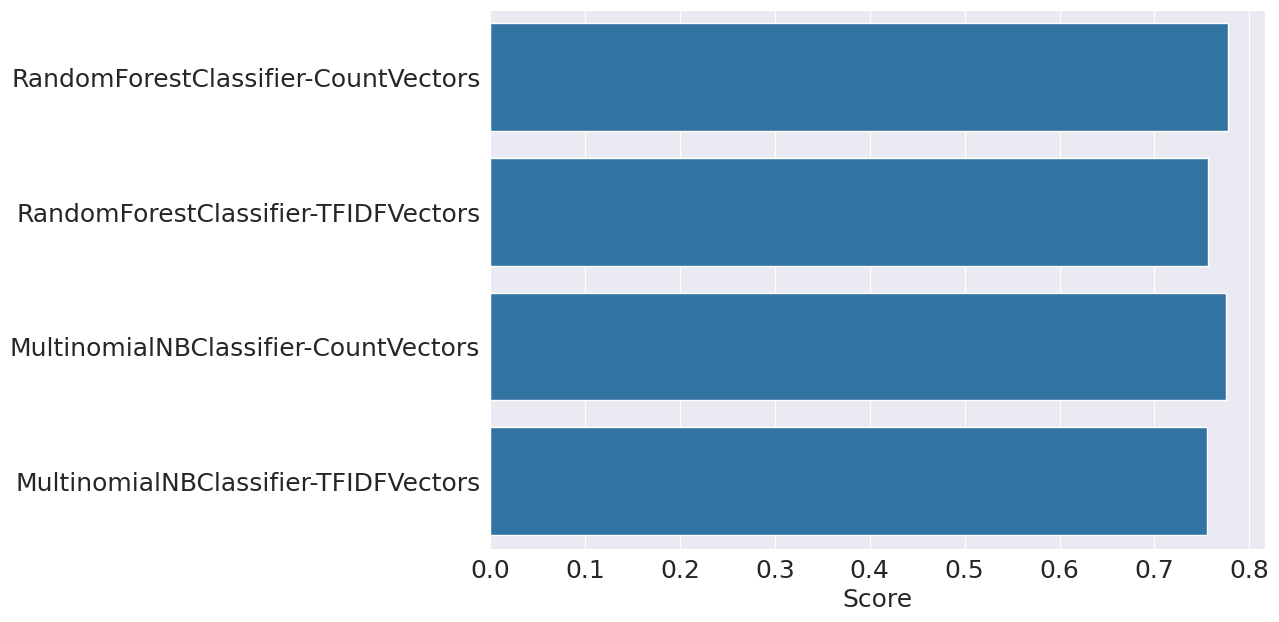

In [ ]:
sns.barplot(data=model_df, y='Model', x='Score')
plt.ylabel('')
plt.show()